In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
yt.funcs.mylog.setLevel(50)
%matplotlib inline

![](div_test.png "Divergence test for modified source")

# Imposed external heating test

In the planar version of MAESTROeX, in one-dimension we should have
$$
\frac{\partial w}{\partial z} = S, \quad \frac{\partial \rho}{\partial t} = - \frac{\partial (\rho w)}{\partial z}, \quad \frac{\partial P}{\partial z} = -g\rho,
$$
which gives
$$
S = - \frac{\partial}{\partial z}\left[ \left(\frac{\partial P}{\partial t}\right) / \left(\frac{\partial P}{\partial z}\right) \right].
$$
Then if we select $P(z,t)$ we can find the appropriate heating $S(z,t)$. In this test we take
$$
P(z,t) = a + b(H-z) - c\sin(\pi z /H) \exp\left({-t/T}\right), \quad \frac{\partial P}{\partial z} < 0, \quad P \geq 0,
$$
where $H$ is the height of the domain and $a,b,c,T \geq0$.
This has $\int_{0}^{\rm top} S dz = 0$ and should be implemented with $\it closed$ boundaries. If we take $c=H/\pi$, then $b > 1 \implies \partial {P}/\partial z < 0$. Then we have
$$
S = \frac{\partial }{\partial z}\left(\frac{(c/T)e^{-t/T}\sin(z/c)}{e^{-t/T}\cos(z/c) + b}\right) = \boxed{\frac{(1/T)e^{-2t/T}\sin^2(z/c)}{\left[e^{-t/T}\cos(z/c) + b \right]^2}  + \frac{(1/T)e^{-t/T}\cos(z/c) } {e^{-t/T}\cos(z/c) + b}
}.
$$

For testing we take $a=2$, $b=2$, $H=10$, $g=-1$ and $T=1$ below. __Note that $y$ and $z$ are used interchangeably.__

In [2]:
## Test parameters
a  = 2.
b  = 2.
H  = 10.
c  = H / np.pi
Ts = 1.

# imposed S
def S_ref(y,t):
    E  = np.exp(-t/Ts)
    B  = E*np.cos(y/c) + b
    F  = (np.exp(-2*t/Ts)*(np.sin(y/c)**2)/B**2) + (E*np.cos(y/c)/B)
    return F/Ts

# p 
def p_exact(y,t):
    return a + b*(H-y) - c*np.sin(y/c)*np.exp(-t/Ts)
   
# rho
def rho_exact(y,t):
    return np.exp(-t/Ts)*np.cos(y/c) + b

# w
def w_exact(y,t):
    return (c/Ts)*np.sin(y/c)*np.exp(-t/Ts)/rho_exact(y,t)

In [3]:
## gets an ordered list of the directories containing the plotfiles.
import re
import os
def getPltFiles(dataDir):
    dirs = [f.name for f in os.scandir(dataDir) if f.is_dir() ]    
    matches = [dataDir + string for string in dirs if re.match(r"plt[0-9]{4,7}$", string)]
    return sorted(matches)

def GetSlice(Dir,N=0,w_0='w0y'):
    Files     = getPltFiles(Dir)
    Data      = yt.load(Files[N])
    Grid_Data = Data.covering_grid(level=0,left_edge=[0,0.0,0.0],dims=Data.domain_dimensions)    
    S    = Grid_Data['S'][0,:,0]
    rho0 = Grid_Data['rho0'][0,:,0]    
    p0   = Grid_Data['p0'][0,:,0]
    w0   = Grid_Data[w_0][0,:,0]
    R = {}
    R.update({'rho0':rho0})
    R.update({'p0':p0}) 
    R.update({'w0':w0})
    R.update({'S':S})
    return R

dir_='./'

sim_5  = GetSlice(dir_,5,'vely')   # t = T / 2 
sim_10 = GetSlice(dir_,10,'vely')  # t = T

y = np.linspace(0,H,128,endpoint=False)
dy=y[1]-y[0]
hdy=0.5*dy
y_sim=y+hdy

In [4]:
## Plotting routine
ms=1.5
y_=y_sim
fs=16
def plot_q(title,label,fun,ID):
    def plot_(fun,data_05,data_10,pref,ID,I,label,title):
        plt.subplot(I)
        plt.plot(y,fun(y,0.5),'-',label=r'Expected, $t=0.5 T$')
        plt.plot(y,fun(y,1.0),'-',label=r'Expected, $t=1.0 T$')
        plt.plot(y_,data_05[ID],'o',ms=ms,label=pref+', $t=0.5 T$')
        plt.plot(y_,data_10[ID],'o',ms=ms,label=pref+', $t=1.0 T$')
        plt.xlabel(r'$y$',fontsize=fs)
        plt.ylabel(label,fontsize=fs)
        plt.title(title,fontsize=fs)
        plt.legend(fontsize=fs)
    
    data_05=sim_5
    data_10=sim_10
    pref='split'
    I=111
    plot_(fun,data_05,data_10,pref,ID,I,label,title)    

Check $S$ evolves correctly.

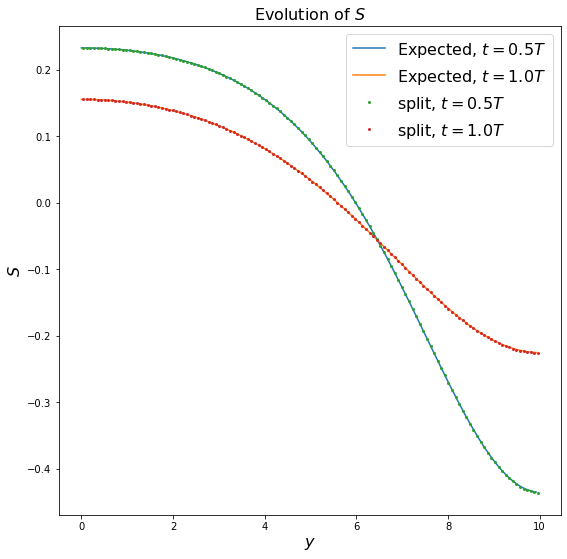

In [5]:
fac=9
plt.figure(figsize=(fac,fac))
ms=2.4*fac/11.

ID='S'
fun=S_ref
label=r'$S$'
title=r'Evolution of $S$'
plot_q(title,label,fun,ID)

Check the presure, density and velocity evolve according to the exact solution.

Evolution of $\rho_0$.

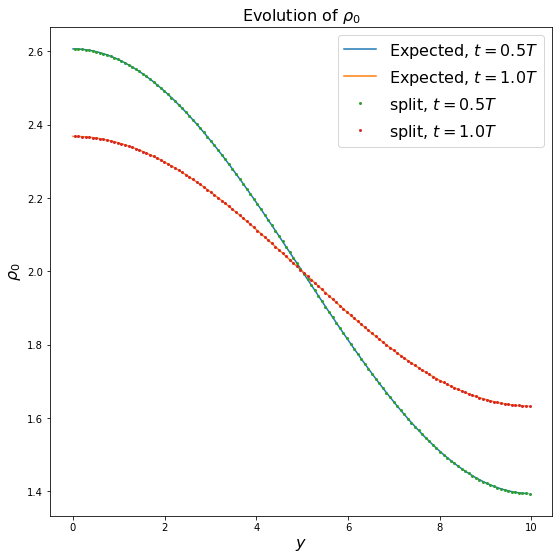

In [6]:
fac=9
plt.figure(figsize=(fac,fac))
ms=2.4*fac/11.

ID='rho0'
fun=rho_exact
label=r'$\rho_0$'
title=r'Evolution of $\rho_0$'
plot_q(title,label,fun,ID)

Evolution of $p_0$.

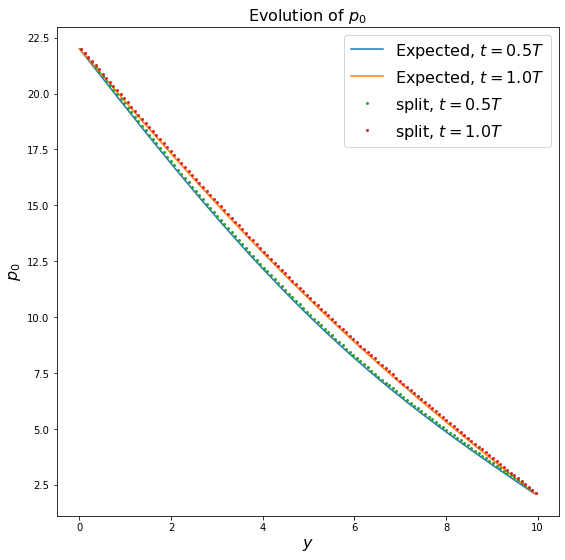

In [7]:
plt.figure(figsize=(fac,fac))

ID='p0'
fun=p_exact
label=r'$p_0$'
title=r'Evolution of $p_0$'
plot_q(title,label,fun,ID)

Evolution of $w_0$

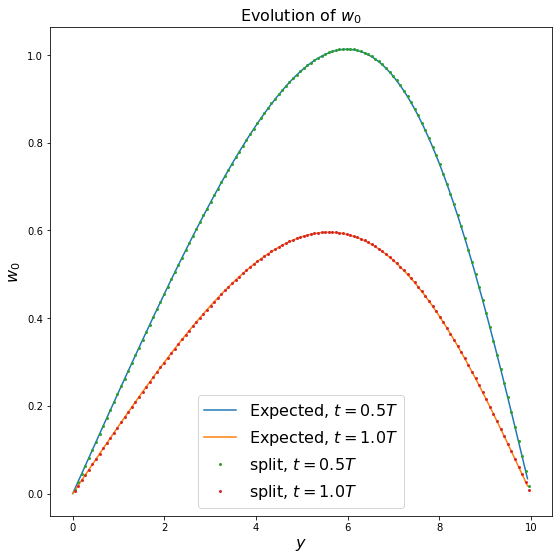

In [8]:
plt.figure(figsize=(fac,fac))

ID='w0'
fun=w_exact
label=r'$w_0$'
title=r'Evolution of $w_0$'
plot_q(title,label,fun,ID)